In [81]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/fluency_noncerebellar/redo_pearson'

# Generate FWE Corrected R-Squared Map 
- Using maximum statistic correction
- Notes on controlling a regression:
    - Adding covariates to a regression will 'control' for them, but will almost always increase the R-squared. 
    - To 'remove' a covariate from the regression, you will want to regress a nuisance covariate OUT of the covariate of interest. 
        - This means your regressor will become the residuals from the regression of cov_1 ~ nuisance_cov1

Import Niftis
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the covarite DF column names below
- Column labels are subject IDs. 
- This is expected to ultimately have the form:

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Voxel 1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| . . .      | ...         | ...        | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...          | ... | ...           | ...           | ...           | ...           | ...           | ...           | 7           | ...           | ...           | ...           |
| Voxel N     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |

In [82]:
import_path = '/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-*/connectivity/'
file_target= 'sub-*-yeo1k_stat-t_conn.nii.gz'

In [83]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
giinii = GiiNiiFileImport(import_path=import_path, file_column=None, file_pattern=file_target)
nimg_df = giinii.run()
nimg_df

Attempting to import from: /Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-*/connectivity//sub-*-yeo1k_stat-t_conn.nii.gz


,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-026/connectivity/sub-026_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-088/connectivity/sub-088_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-043/connectivity/sub-043_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-044/connectivity/sub-044_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-072/connectivity/sub-072_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-075/connectivity/sub-075_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-081/connectivity/sub-081_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-029/connectivity/sub-029_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-027/connectivity/sub-027_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-080/connectivity/sub-080_tome-yeo1k_stat-t_conn.nii.gz,...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-097/connectivity/sub-097_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-063/connectivity/sub-063_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-055/connectivity/sub-055_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-099/connectivity/sub-099_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-036/connectivity/sub-036_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-038/connectivity/sub-038_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-053/connectivity/sub-053_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-098/connectivity/sub-098_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-062/connectivity/sub-062_tome-yeo1k_stat-t_conn.nii.gz,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-065/connectivity/sub-065_tome-yeo1k_stat-t_conn.nii.gz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fix names

In [84]:
pre = '/sub-'
post = '/connectivity'

In [85]:
nimg_df = GiiNiiFileImport.splice_colnames(nimg_df, pre, post)
nimg_df

,026,088,043,044,072,075,081,029,027,080,...,097,063,055,099,036,038,053,098,062,065
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Import Covariates

**The CSV is expected to be in this format**
- sub column contents MUST match the names of the neuroimaging files above. 
    - ID column 
```
+-----+----------------------------+--------------+--------------+--------------+
| sub | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [86]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/metadata/mergedNotCerebellumExtensive.csv'
sheet= None #'master_list_proper_subjects'

In [87]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

,study_id,subject,MotorL_acute,MotorR_acute,Motor_IC_acute,MotorL_3month,MotorR_3month,Motor_IC_3month,MotorL_1year,MotorR_1year,...,gdss_12_1year,gdss_13_1year,gdss_14_1year,gdss_15_1year,gdss_score_1year,clock_acute,mes_tot_miss_acute,file,conn_path,roi_paths
0,FCS024,24,NaN,NaN,NaN,-1.3652,0.5878,-0.7725,-1.0227,0.2821,...,1.0,0.0,0.0,0.0,3.0,6.0,45.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
1,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
2,FCS027,27,NaN,NaN,NaN,0.6425,-0.5805,0.0808,0.7433,0.3375,...,0.0,0.0,0.0,0.0,0.0,12.0,2.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
3,FCS029,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.0,2.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
4,FCS030,30,NaN,NaN,NaN,0.3583,0.5973,0.7771,-0.1659,0.6261,...,1.0,1.0,0.0,1.0,13.0,12.0,31.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,FCS192,192,0.7975,0.5861,0.8521,0.7416,0.4959,0.9150,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
131,NaN,193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
132,NaN,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
133,FCS195,195,-2.3491,0.0868,-1.7040,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,38.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...


**Preprocess Your Data**

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [88]:
data_df.columns

Index(['study_id', 'subject', 'MotorL_acute', 'MotorR_acute', 'Motor_IC_acute',
       'MotorL_3month', 'MotorR_3month', 'Motor_IC_3month', 'MotorL_1year',
       'MotorR_1year',
       ...
       'gdss_12_1year', 'gdss_13_1year', 'gdss_14_1year', 'gdss_15_1year',
       'gdss_score_1year', 'clock_acute', 'mes_tot_miss_acute', 'file',
       'conn_path', 'roi_paths'],
      dtype='object', length=207)

In [89]:
drop_list = ['conn_path', 'animal_raw_acute']

In [90]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,study_id,subject,MotorL_acute,MotorR_acute,Motor_IC_acute,MotorL_3month,MotorR_3month,Motor_IC_3month,MotorL_1year,MotorR_1year,...,gdss_12_1year,gdss_13_1year,gdss_14_1year,gdss_15_1year,gdss_score_1year,clock_acute,mes_tot_miss_acute,file,conn_path,roi_paths
0,FCS024,24,NaN,NaN,NaN,-1.3652,0.5878,-0.7725,-1.0227,0.2821,...,1.0,0.0,0.0,0.0,3.0,6.0,45.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
2,FCS027,27,NaN,NaN,NaN,0.6425,-0.5805,0.0808,0.7433,0.3375,...,0.0,0.0,0.0,0.0,0.0,12.0,2.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
3,FCS029,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.0,2.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
4,FCS030,30,NaN,NaN,NaN,0.3583,0.5973,0.7771,-0.1659,0.6261,...,1.0,1.0,0.0,1.0,13.0,12.0,31.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
6,FCS033,33,NaN,NaN,NaN,0.5409,0.5969,1.0570,0.5539,0.6243,...,0.0,1.0,0.0,0.0,1.0,13.0,8.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,FCS188,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.0,7.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
128,FCS190,190,0.5500,0.4488,0.8934,0.4367,0.2777,0.9381,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,11.0,0.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
130,FCS192,192,0.7975,0.5861,0.8521,0.7416,0.4959,0.9150,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
133,FCS195,195,-2.3491,0.0868,-1.7040,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,38.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [91]:
# column = 'City'  # The column you'd like to evaluate
# condition = 'not'  # Thecondition to check ('equal', 'above', 'below', 'not')
# value = 'Toronto' # The value to compare against

In [92]:
# data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
# data_df

In [93]:
# data_df['subject'] = data_df['subject'].apply(lambda x: x.split('_S_')[1])
data_df


,study_id,subject,MotorL_acute,MotorR_acute,Motor_IC_acute,MotorL_3month,MotorR_3month,Motor_IC_3month,MotorL_1year,MotorR_1year,...,gdss_12_1year,gdss_13_1year,gdss_14_1year,gdss_15_1year,gdss_score_1year,clock_acute,mes_tot_miss_acute,file,conn_path,roi_paths
0,FCS024,24,NaN,NaN,NaN,-1.3652,0.5878,-0.7725,-1.0227,0.2821,...,1.0,0.0,0.0,0.0,3.0,6.0,45.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
2,FCS027,27,NaN,NaN,NaN,0.6425,-0.5805,0.0808,0.7433,0.3375,...,0.0,0.0,0.0,0.0,0.0,12.0,2.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
3,FCS029,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.0,2.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
4,FCS030,30,NaN,NaN,NaN,0.3583,0.5973,0.7771,-0.1659,0.6261,...,1.0,1.0,0.0,1.0,13.0,12.0,31.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
6,FCS033,33,NaN,NaN,NaN,0.5409,0.5969,1.0570,0.5539,0.6243,...,0.0,1.0,0.0,0.0,1.0,13.0,8.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,FCS188,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.0,7.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
128,FCS190,190,0.5500,0.4488,0.8934,0.4367,0.2777,0.9381,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,11.0,0.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
130,FCS192,192,0.7975,0.5861,0.8521,0.7416,0.4959,0.9150,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
133,FCS195,195,-2.3491,0.0868,-1.7040,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,38.0,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...


Regress out a Covariate

In [94]:
nimg_df.columns

Index(['026', '088', '043', '044', '072', '075', '081', '029', '027', '080',
       ...
       '097', '063', '055', '099', '036', '038', '053', '098', '062', '065'],
      dtype='object', length=135)

Regress values out of a Clinical Variable

In [95]:
# from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
# # use this code block to regress out covariates. Generally better to just include as covariates in a model..
# dependent_variable_list = ['Age']
# regressors = ['DIAGNOSIS_CURRENT']

# data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
# print(adjusted_dep_vars_list)

Regress Values of out the Neuroimaging Variable

In [96]:
# pending

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [97]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['subject']

In [98]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

Unable to standardize column study_id.
Unable to standardize column motor_note_acute.
Unable to standardize column motor_note_3month.
Unable to standardize column motor_note_1year.
Unable to standardize column nih_note_acute.
Unable to standardize column nih_note_3month.
Unable to standardize column nih_note_1year.
Unable to standardize column bvmt_file_acute.
Unable to standardize column bvmt_file_3month.
Unable to standardize column bvmt_file_1year.
Unable to standardize column file.
Unable to standardize column conn_path.
Unable to standardize column roi_paths.


,study_id,subject,MotorL_acute,MotorR_acute,Motor_IC_acute,MotorL_3month,MotorR_3month,Motor_IC_3month,MotorL_1year,MotorR_1year,...,gdss_12_1year,gdss_13_1year,gdss_14_1year,gdss_15_1year,gdss_score_1year,clock_acute,mes_tot_miss_acute,file,conn_path,roi_paths
0,FCS024,24,NaN,NaN,NaN,-1.776153,0.378304,-1.290548,-1.557934,-0.017933,...,1.982062,-0.877058,-0.308607,-0.594089,-0.219354,-1.182778,2.183479,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
2,FCS027,27,NaN,NaN,NaN,0.560553,-1.075921,-0.299461,0.693860,0.055379,...,-0.504525,-0.877058,-0.308607,-0.594089,-1.002222,0.220366,-0.504300,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
3,FCS029,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.454223,-0.504300,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
4,FCS030,30,NaN,NaN,NaN,0.229780,0.390129,0.509275,-0.465444,0.437289,...,1.982062,1.140175,-0.308607,1.683251,2.390204,0.220366,1.308388,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
6,FCS033,33,NaN,NaN,NaN,0.442303,0.389632,0.834372,0.452359,0.434907,...,-0.504525,1.140175,-0.308607,-0.594089,-0.741266,0.454223,-0.129261,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,FCS188,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.454223,-0.191767,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
128,FCS190,190,0.581871,0.434134,0.906644,0.321028,-0.007688,0.696273,NaN,NaN,...,-0.504525,-0.877058,-0.308607,-0.594089,-1.002222,-0.013492,-0.629313,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
130,FCS192,192,0.814961,0.576099,0.866595,0.675892,0.263913,0.669443,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.884350,NaN,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...
133,FCS195,195,-2.148436,0.059835,-1.612062,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.247349,1.745934,/data/nimlab/dl_archive/Corbetta_Controls/sub-...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...,/Volumes/HowExp/datasets/02a_Corbetta_Stroke_L...


Choose Rows to Keep

In [99]:
print(data_df.columns)

Index(['study_id', 'subject', 'MotorL_acute', 'MotorR_acute', 'Motor_IC_acute',
       'MotorL_3month', 'MotorR_3month', 'Motor_IC_3month', 'MotorL_1year',
       'MotorR_1year',
       ...
       'gdss_12_1year', 'gdss_13_1year', 'gdss_14_1year', 'gdss_15_1year',
       'gdss_score_1year', 'clock_acute', 'mes_tot_miss_acute', 'file',
       'conn_path', 'roi_paths'],
      dtype='object', length=207)


In [100]:
subcol = 'subject'

In [101]:
col_to_keep_list = [subcol, 'animal_raw_acute']

- The final DF is EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the neuroimaging DF column names above
- There should only be 1 variable  the row

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Indep. Var.    | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |

In [102]:
data_df=data_df.loc[:, col_to_keep_list]
data_df = data_df.T
data_df.columns = data_df.loc[subcol]
data_df = data_df.drop(subcol)
data_df.dropna(inplace=True, axis=1)
data_df

subject,24.0,27.0,29.0,30.0,33.0,35.0,36.0,37.0,38.0,39.0,...,180.0,182.0,183.0,184.0,187.0,188.0,190.0,192.0,195.0,196.0
animal_raw_acute,-1.862934,-1.862934,-0.686148,0.359885,0.490639,0.490639,1.79818,1.013655,1.275164,0.359885,...,-1.07841,-1.339918,-0.816902,0.752147,1.144409,0.098377,-0.163131,-1.862934,0.359885,1.013655


Is there a particular mask you want to use?
- MUST match the resolution of voxelwise data being analyzed. 
- If you set None, the voxelwise data will be used for thresholding. 
    - Values below mask_threshold (float) will be set to 0. 
- Warning: bad masking may result in failed experiments. Erroneous voxels outside the brain will influence the correction. 

In [124]:
mask_path = '/Users/cu135/hires_backdrops/mni/MNI152_T1_2mm_brain_mask_dil.nii.gz'
mask_threshold = 0

Correlation method
- spearman or pearson

In [125]:
method = 'pearson'

Choose Max Stat Correction Method
- None | pseudo_var_smooth | var_smooth

In [126]:
max_stat_method = 'pseudo_var_smooth'

In [123]:
from calvin_utils.permutation_analysis_utils.correlation_fwe import CalvinFWEMap
for index, row in data_df.iterrows():
    calvin_fwe = CalvinFWEMap(neuroimaging_dataframe=nimg_df, 
                            variable_dataframe=data_df.loc[[index], :], 
                            mask_threshold=mask_threshold, 
                            mask_path=mask_path, out_dir=out_dir, 
                            method=method, max_stat_method=max_stat_method, vectorize=True)
    calvin_fwe.permutation_test_r_map(n_permutations=1, debug=False)

Permuting: 100%|██████████| 1/1 [00:00<00:00,  7.84it/s]


95th percentile of permuted statistic:  0.3693381637724134
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/fluency_noncerebellar/redo_pearson
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/fluency_noncerebellar/redo_pearson
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/fluency_noncerebellar/redo_pearson


Visualize the FWE Corrected Image


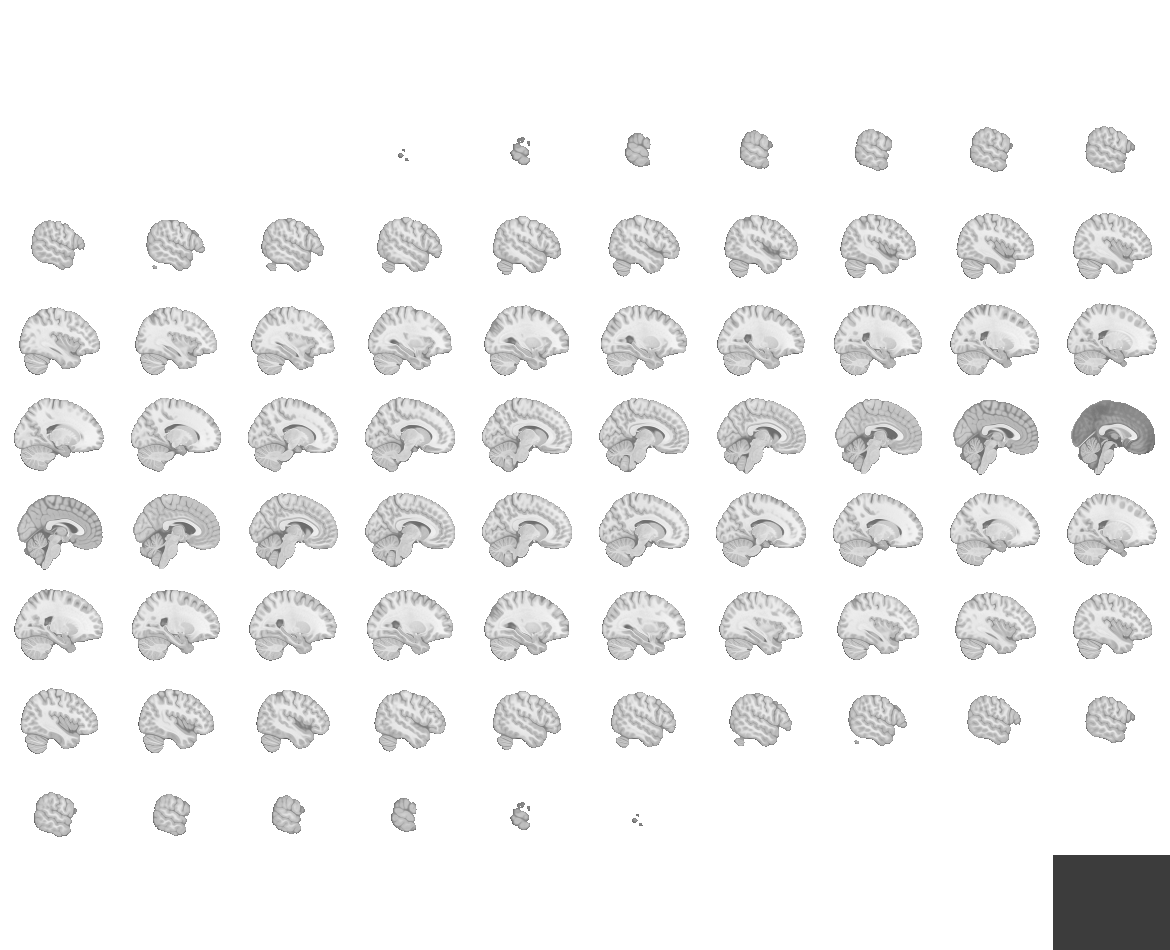
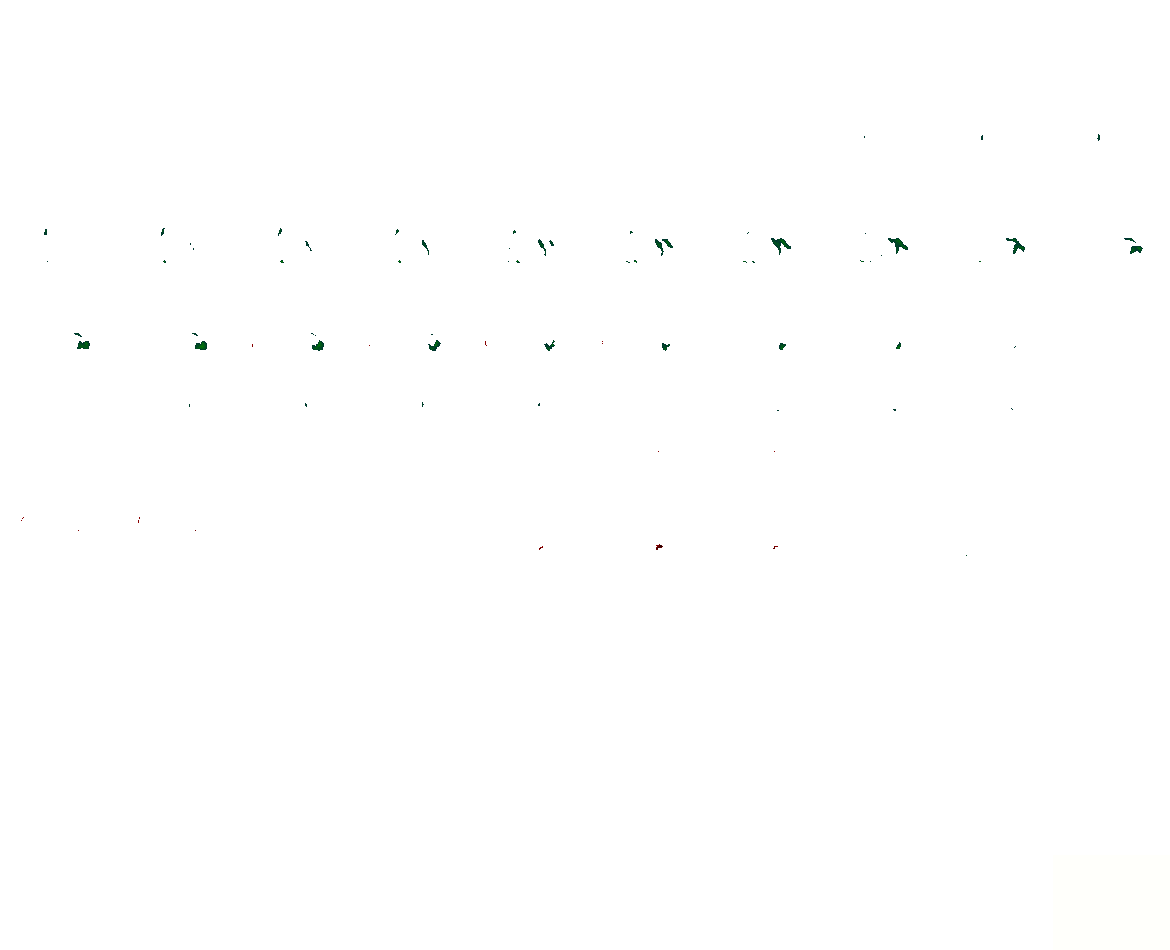

In [113]:
calvin_fwe.corrected_img

Visualize the P-Values (FWE Corrected) Used to Correct the Above


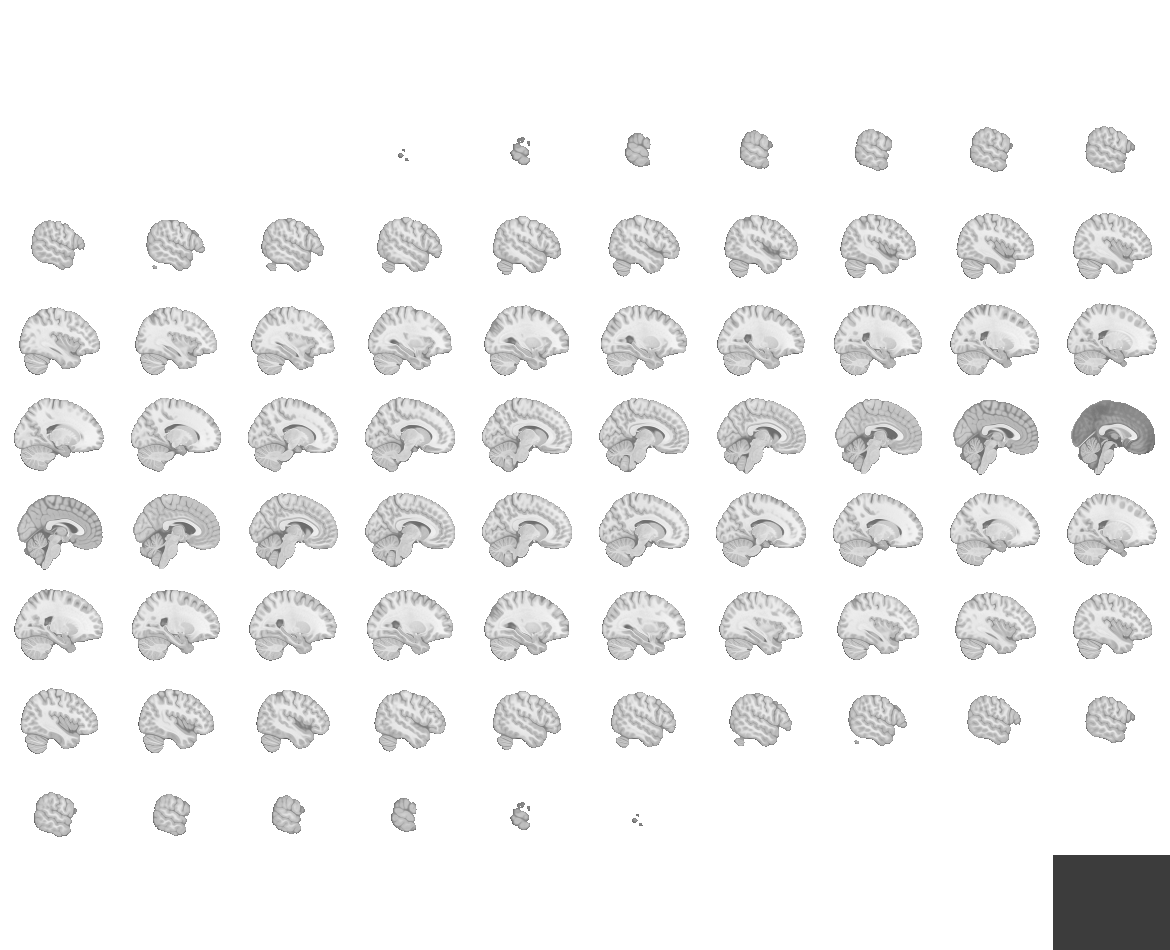
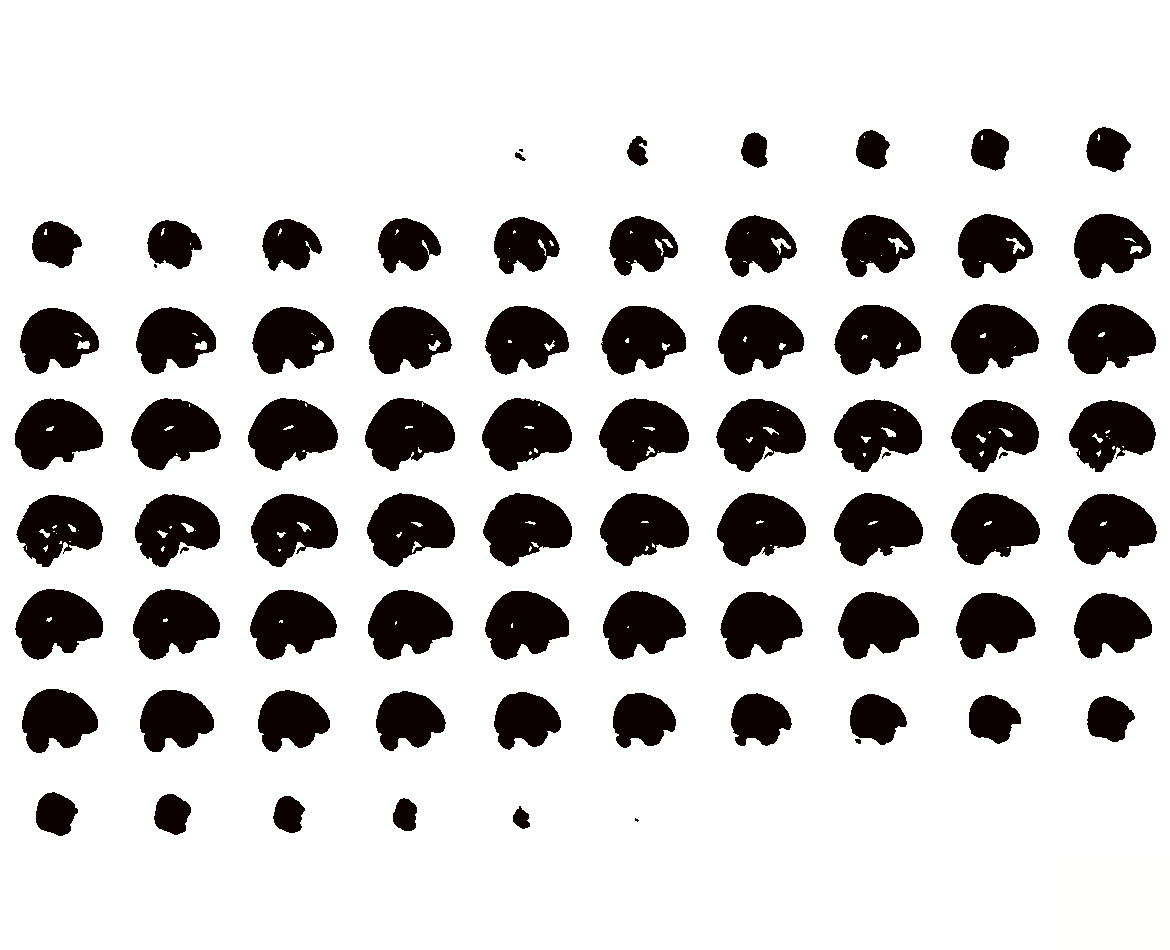

In [114]:
calvin_fwe.p_img

Visualize the Uncorrected Image


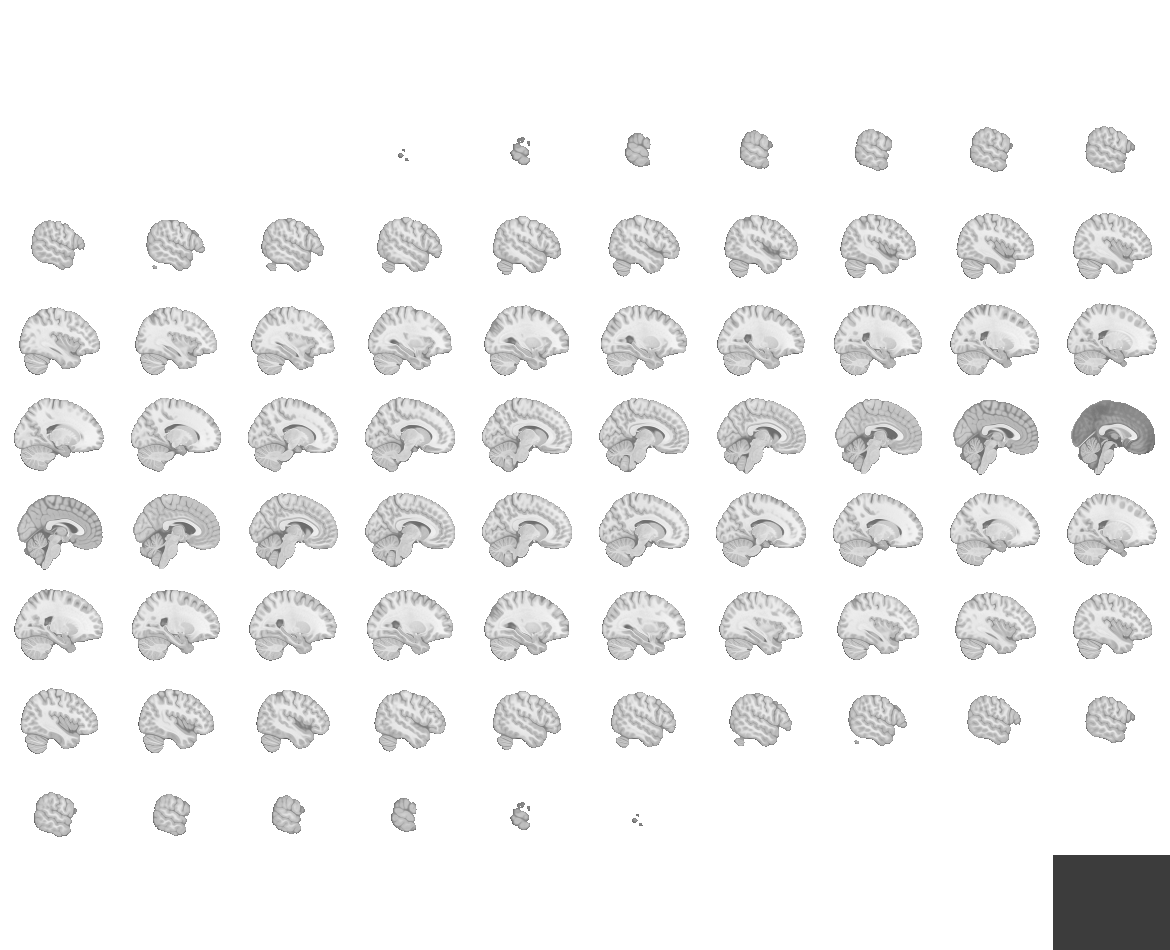
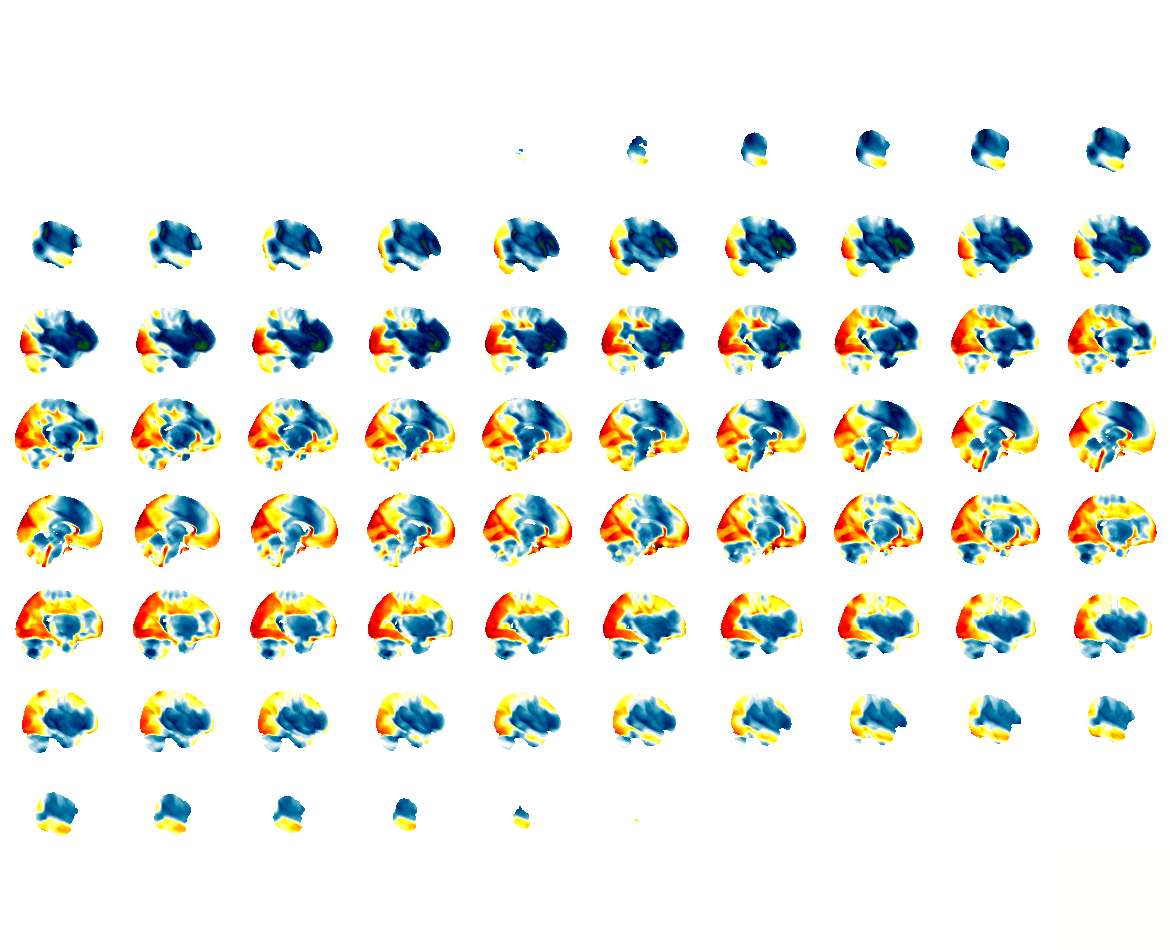

In [115]:
calvin_fwe.uncorrected_img